# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
import json
import os


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count  (this is a list from citipy)
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Test the code using only 2 cities instead of 600+
#cities = ['Paris', 'London']

In [6]:
url = 'https://openweathermap.org/api'

query_url = url + 'appid=' + weather_api_key + '&q='


# Loop through the list of cities and perform a request for data on each

for x in range(len(cities)):
    print(f'Processing: {x} : {cities[x]}')



#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

#a = requests.get(url)
#response = a.json()
#print(response)

Processing: 0 : pangnirtung
Processing: 1 : hilo
Processing: 2 : fortuna
Processing: 3 : adrar
Processing: 4 : boguchany
Processing: 5 : villa del rosario
Processing: 6 : barrow
Processing: 7 : chadiza
Processing: 8 : gat
Processing: 9 : vitim
Processing: 10 : iqaluit
Processing: 11 : hobart
Processing: 12 : pochutla
Processing: 13 : sangar
Processing: 14 : sao filipe
Processing: 15 : evensk
Processing: 16 : nsanje
Processing: 17 : amderma
Processing: 18 : howard springs
Processing: 19 : natal
Processing: 20 : kapaa
Processing: 21 : upernavik
Processing: 22 : kracheh
Processing: 23 : naifaru
Processing: 24 : ushuaia
Processing: 25 : kodiak
Processing: 26 : cap malheureux
Processing: 27 : atuona
Processing: 28 : kropotkin
Processing: 29 : talawdi
Processing: 30 : marcona
Processing: 31 : lavrentiya
Processing: 32 : port alfred
Processing: 33 : hermanus
Processing: 34 : constitucion
Processing: 35 : kilrush
Processing: 36 : kununurra
Processing: 37 : aldan
Processing: 38 : souillac
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Values needed from api: city name, lat, lng, max temp, humidity, cloudiness, windspeed, country, date

name = []
lat = []
lng = []
max_temp = []
humid = []
cloud = []
wind = []
country = []
date = []

url_and_api = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid="+ weather_api_key

celsius = '&units=metric'



# Study documentation to see how to make the request
for city in cities:
    
    try:
    
        response = requests.get(f'{url_and_api}&q={city}').json()
        
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    
    except:
        name.append(None)
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        humid.append(None)
        cloud.append(None)
        wind.append(None)
        country.append(None)
        date.append(None)
        
    continue


In [18]:
w_data = pd.DataFrame({'City':cities, 
                             'Lat':lat,
                             'Lng':lng,
                             'Max Temp':max_temp,
                             'Humidity':humid,
                             'Cloudiness':cloud,
                             'Wind Speed':wind,
                             'Country':country,
                             'Date':date
                            })

w_data.dropna(inplace=True)
w_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangnirtung,66.1451,-65.7125,-27.00,69.0,20.0,1.68,CA,1.615659e+09
1,hilo,19.7297,-155.0900,21.00,78.0,75.0,2.22,US,1.615659e+09
2,fortuna,40.5982,-124.1573,11.11,81.0,90.0,3.09,US,1.615659e+09
3,adrar,20.5022,-10.0711,27.35,9.0,81.0,3.75,MR,1.615659e+09
4,boguchany,58.3814,97.4531,-17.14,96.0,22.0,2.73,RU,1.615659e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
w_data['Humidity'].max()


100.0

In [17]:
#  Get the indices of cities that have humidity over 100%.
print('There is no humidity over 100%')

There is no humidity over 100%


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

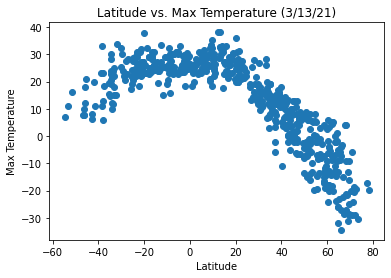

In [23]:
# Plot Data
x = w_data['Lat']
y = w_data['Max Temp']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Max Temperature (3/13/21)')
plt.show()

## Latitude vs. Humidity Plot

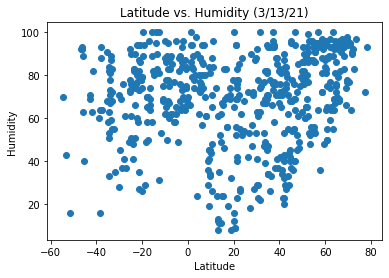

In [25]:
# Plot Data
x = w_data['Lat']
y = w_data['Humidity']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity (3/13/21)')
plt.show()

## Latitude vs. Cloudiness Plot

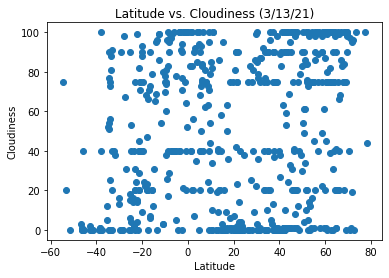

In [27]:
# Plot Data
x = w_data['Lat']
y = w_data['Cloudiness']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness (3/13/21)')
plt.show()

## Latitude vs. Wind Speed Plot

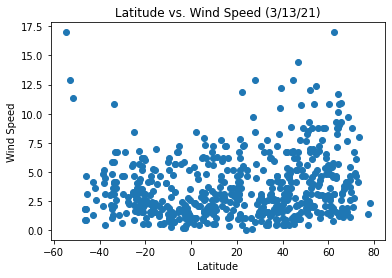

In [28]:
# Plot Data
x = w_data['Lat']
y = w_data['Wind Speed']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed (3/13/21)')
plt.show()

## Linear Regression

In [30]:
# split dataframe into northern and southern hemisphere

north_data = w_data.loc[(w_data['Lat']>=0)]
south_data = w_data.loc[(w_data['Lat']<=0)]

north_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangnirtung,66.1451,-65.7125,-27.00,69.0,20.0,1.68,CA,1.615659e+09
1,hilo,19.7297,-155.0900,21.00,78.0,75.0,2.22,US,1.615659e+09
2,fortuna,40.5982,-124.1573,11.11,81.0,90.0,3.09,US,1.615659e+09
3,adrar,20.5022,-10.0711,27.35,9.0,81.0,3.75,MR,1.615659e+09
4,boguchany,58.3814,97.4531,-17.14,96.0,22.0,2.73,RU,1.615659e+09
...,...,...,...,...,...,...,...,...,...
631,baykit,61.6700,96.3700,-14.33,89.0,100.0,4.77,RU,1.615660e+09
632,sturgis,41.7992,-85.4192,9.44,23.0,1.0,3.60,US,1.615659e+09
634,najran,17.4924,44.1277,26.00,19.0,36.0,3.09,SA,1.615660e+09
635,goderich,43.7501,-81.7165,0.00,55.0,24.0,6.69,CA,1.615660e+09


In [31]:
south_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
7,chadiza,-14.0678,32.4392,19.38,95.0,95.0,1.39,ZM,1.615659e+09
11,hobart,-42.8794,147.3294,8.00,71.0,0.0,4.12,AU,1.615659e+09
16,nsanje,-16.9200,35.2620,23.32,96.0,71.0,2.46,MW,1.615659e+09
18,howard springs,-12.4970,131.0470,25.00,100.0,99.0,0.51,AU,1.615659e+09
19,natal,-5.7950,-35.2094,31.00,58.0,40.0,6.69,BR,1.615659e+09
...,...,...,...,...,...,...,...,...,...
620,tadine,-21.5500,167.8833,23.89,82.0,29.0,5.49,NC,1.615660e+09
621,kroya,-7.6331,109.2461,25.43,83.0,99.0,0.69,ID,1.615660e+09
622,caleta de carquin,-11.0925,-77.6267,25.16,69.0,3.0,4.06,PE,1.615660e+09
626,vao,-22.6667,167.4833,24.54,76.0,24.0,6.77,NC,1.615660e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

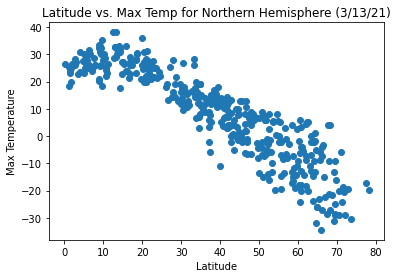

In [34]:
# Plot Data
x = north_data['Lat']
y = north_data['Max Temp']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Max Temp for Northern Hemisphere (3/13/21)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

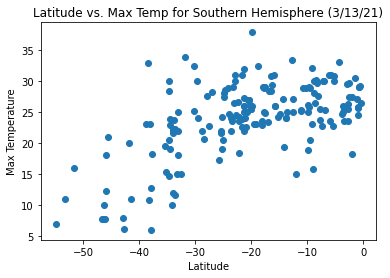

In [36]:
# Plot Data
x = south_data['Lat']
y = south_data['Max Temp']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Max Temp for Southern Hemisphere (3/13/21)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

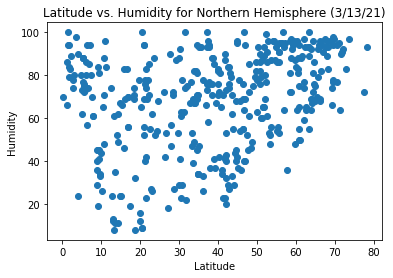

In [37]:
# Plot Data
x = north_data['Lat']
y = north_data['Humidity']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity for Northern Hemisphere (3/13/21)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

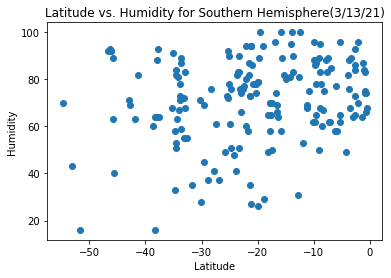

In [38]:
# Plot Data
x = south_data['Lat']
y = south_data['Humidity']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity for Southern Hemisphere(3/13/21)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

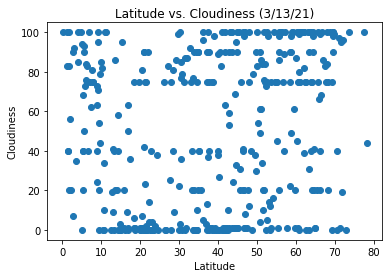

In [39]:
# Plot Data
x = north_data['Lat']
y = north_data['Cloudiness']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness for Northern Hemisphere (3/13/21)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

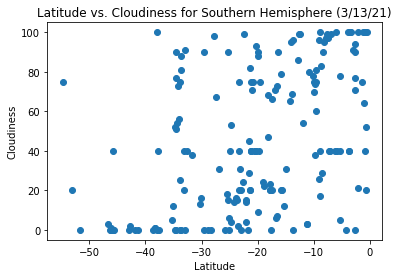

In [40]:
# Plot Data
x = south_data['Lat']
y = south_data['Cloudiness']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness for Southern Hemisphere (3/13/21)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

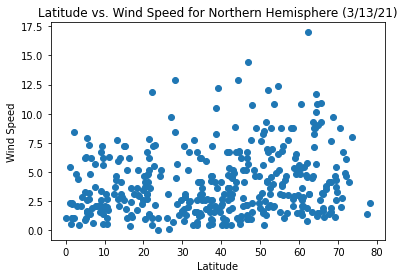

In [41]:
# Plot Data
x = north_data['Lat']
y = north_data['Wind Speed']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed for Northern Hemisphere (3/13/21)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

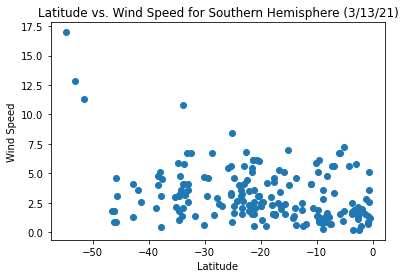

In [42]:
# Plot Data
x = south_data['Lat']
y = south_data['Wind Speed']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed for Southern Hemisphere (3/13/21)')
plt.show()

In [ ]:
# export w_data to csv for VacationPy
w_data.to_csv("..output")